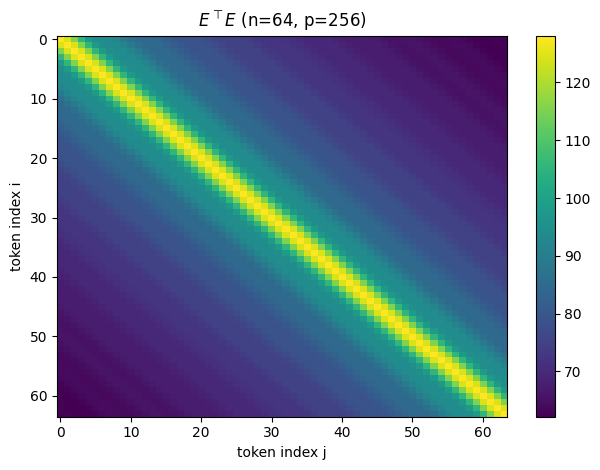

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def positional_encoding(n_tokens: int, p: int) -> np.ndarray:
    """
    E in R^{p x n_tokens} with
    E(2k),i   = sin(i * exp(-2k * log(10000)/p))
    E(2k+1),i = cos(i * exp(-2k * log(10000)/p))
    using i = 0,1,...,n_tokens-1.
    """
    assert p % 2 == 0, "p must be even."
    i = np.arange(n_tokens)[None, :]                 # (1, n)
    k = np.arange(p // 2)[:, None]                   # (p/2, 1)
    div = np.exp(-(2 * k) * np.log(10000.0) / p)     # (p/2, 1)
    angles = i * div                                 # (p/2, n)

    E = np.zeros((p, n_tokens), dtype=np.float64)
    E[0::2, :] = np.sin(angles)
    E[1::2, :] = np.cos(angles)
    return E


# -------------------------
# Task 1b: plot E^T E
# -------------------------
n, p = 64, 256
E = positional_encoding(n_tokens=n, p=p)
ETE = E.T @ E  # (n x n)

plt.figure()
plt.imshow(ETE, aspect="auto")
plt.colorbar()
plt.title(r"$E^\top E$ (n=64, p=256)")
plt.xlabel("token index j")
plt.ylabel("token index i")
plt.tight_layout()

The $E^TE$ matrix elements say how similar the positional encodings of positions i and j are. (In the plot: brighter = more similar (larger dot product), darker = less similar (smaller dot product)) We can observe a diagonal structure. On the diagonal i=j, so brightest makes sense. Positions that are close (∣i−j∣ small) have similar positional vectors → large dot product ∣i−j∣ increases, the dot product decreases → the plot gets darker away from the diagonal.

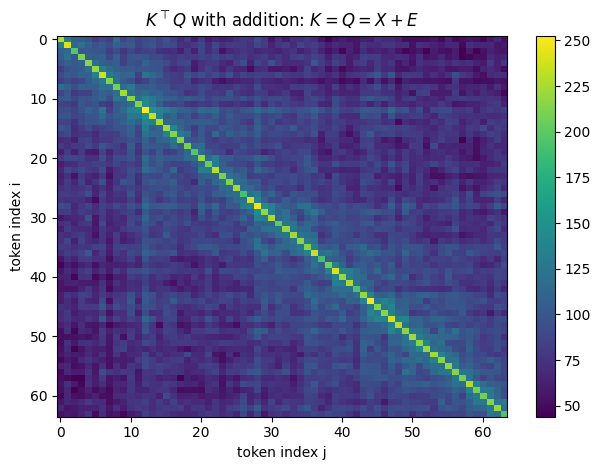

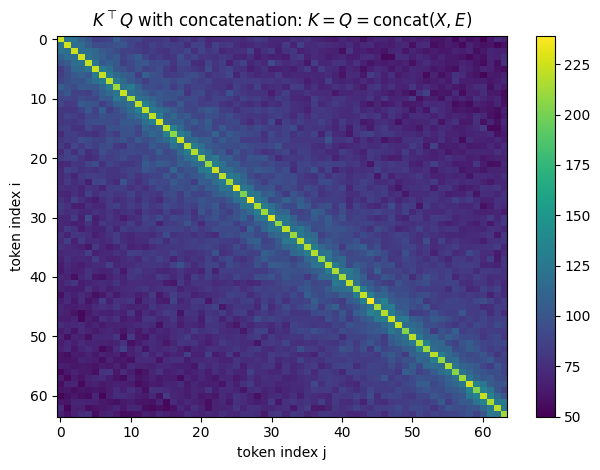

In [3]:
# -------------------------
# Task 1c: random features X with same variance as E,
#          then plot K^T Q for addition vs concatenation
# -------------------------
rng = np.random.default_rng(0)
sigma = E.std()                      # match global std of positional embedding
X = rng.normal(0.0, sigma, size=E.shape)

# (i) Addition: K = Q = X + E
S_add = (X + E).T @ (X + E)          # (n x n)

# (ii) Concatenation: K = Q = concat(X, E) in feature-dimension
XE = np.vstack([X, E])               # (2p x n)
S_cat = XE.T @ XE                    # (n x n) = X^T X + E^T E

plt.figure()
plt.imshow(S_add, aspect="auto")
plt.colorbar()
plt.title(r"$K^\top Q$ with addition: $K=Q=X+E$")
plt.xlabel("token index j")
plt.ylabel("token index i")
plt.tight_layout()

plt.figure()
plt.imshow(S_cat, aspect="auto")
plt.colorbar()
plt.title(r"$K^\top Q$ with concatenation: $K=Q=\mathrm{concat}(X,E)$")
plt.xlabel("token index j")
plt.ylabel("token index i")
plt.tight_layout()

plt.show()


Both plots have in common, that one can clearly identify the diagonal structure coming from the $E^TE$ term. In both plots there is a tendency for values near the diagonal to be higher, because positional encodings have higher similarity for nearby positions.

For Concatenation:
On top of the effect coming from $E^TE$ term you see noise from $X^⊤X$ since random content vectors give random dot products. As there are no cross terms content and position contribute independently, see 1a. 

For Addition:
As the cross terms depend on both content and position, they “mix” them and distort the pure positional pattern.